In [ ]:
%%capture
!pip install hiperwalk

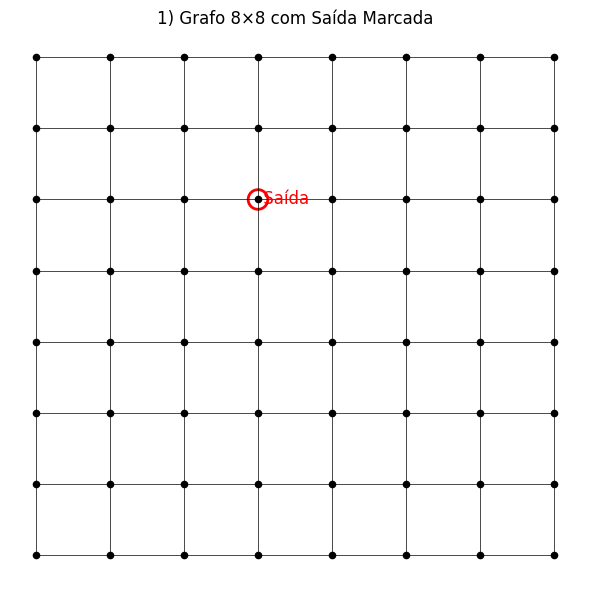

Número de vértices: 64
Passos simulados: 34
Probabilidade de encontrar o walker em cada vértice (0 a 63):


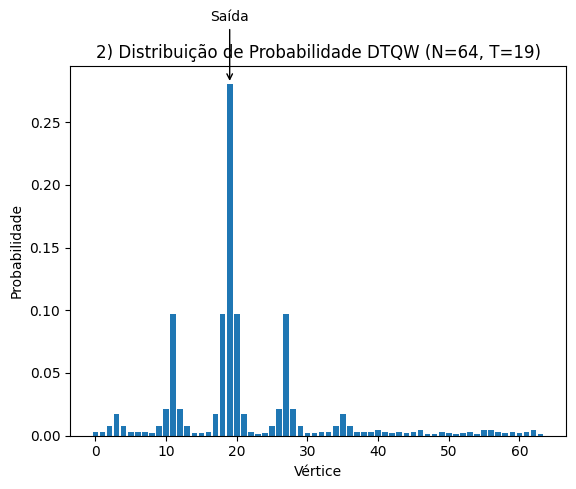

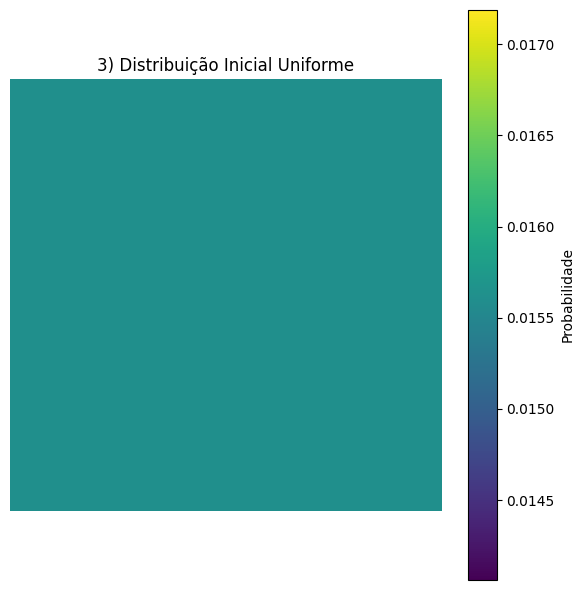

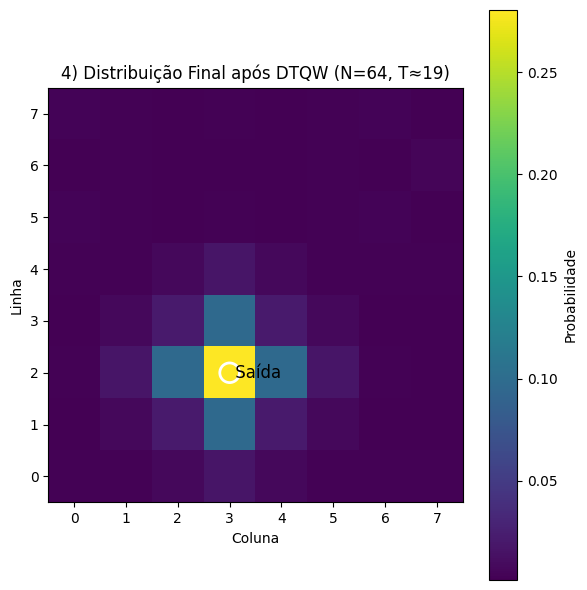

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import hiperwalk as hpw

# --- Parâmetros do problema ---
rows, cols = 8, 8                  # dimensões do grid 2x2
N = rows * cols                     # número de vértices
target_vertex = 19                  # vértice marcado (0 a N-1)
# Complexidade para busca: T ≈ √N · log N (para grid 2D em DTQW)
steps = int(np.ceil(np.sqrt(N) * np.log(N)))

# --- 1) Definição do grafo ---
# Grid quadrada 2x2
grid = hpw.Grid(rows)               # Grid(rows) -> grid rows×rows
# Obs.: para retangular, use Graph ou IntegerLattice conforme necessidade

# --- 2) Construção do quantum walk (DTQW de busca) ---
# shift='flipflop', coin='grover', marked lista de vértices alvo
qw = hpw.Coined(graph=grid, shift='flipflop', coin='grover', marked=[target_vertex])

# --- 3) Estado inicial: superposição uniforme ---
initial_state = qw.uniform_state()

# --- 4) Simulação ---
# simulate(range=(start, end), state) retorna estados U^t|ψ(0)> para t in [start, end)
states = qw.simulate(range=(steps, steps+1), state=initial_state)
# Extrai o estado final (único) da lista de estados
final_state = states[0]

# --- 5) Distribuição de probabilidades ---
# Para evitar erro np.array(copy=False), passe o array 2D diretamente
prob_dist = qw.probability_distribution(states)
# Em seguida extraia a linha correspondente ao único estado simulado
probabilities = prob_dist[0]


# --- 6) Grafo com saída marcada

r, c = divmod(target_vertex, cols)
plt.figure(figsize=(6,6))

for i in range(rows):
    plt.plot([0, cols-1], [i, i], 'k-', linewidth=0.5)
for j in range(cols):
    plt.plot([j, j], [0, rows-1], 'k-', linewidth=0.5)

for v in range(rows * cols):
    rr, cc = divmod(v, cols)
    plt.scatter(cc, rr, color='black', s=20)

plt.scatter(c, r, facecolors='none', edgecolors='red', s=200, linewidths=2)
plt.text(c, r, ' Saída', color='red', va='center', ha='left', fontsize=12)

plt.gca().invert_yaxis()
plt.axis('off')
plt.title(f'1) Grafo {cols}×{rows} com Saída Marcada')
plt.tight_layout()
plt.show()


# --- 7) Exibição de resultados ---
print(f"Número de vértices: {N}")
print(f"Passos simulados: {steps}")
print(f"Probabilidade de encontrar o walker em cada vértice (0 a {N-1}):")
# print(probabilities)

# --- 8) Gráfico de probabilidades
target = np.argmax(probabilities)
max_prob = probabilities[target]

plt.figure()
plt.bar(range(len(probabilities)), probabilities)
plt.xlabel('Vértice')
plt.ylabel('Probabilidade')
plt.title(f'2) Distribuição de Probabilidade DTQW (N={N}, T={target_vertex})')
plt.annotate(
    'Saída',
    xy=(target, max_prob),
    xytext=(target, max_prob + 0.05),
    arrowprops={'arrowstyle': '->'},
    ha='center'
)
plt.show()

# --- 9) Gráfico de Distribiução Inicial (heatmap)

initial = np.ones((rows, cols)) / N
plt.figure(figsize=(6,6))
plt.imshow(initial, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Probabilidade')
plt.title('3) Distribuição Inicial Uniforme')
plt.axis('off')
plt.tight_layout()
plt.show()

# --- 10) Gráfico de Distribuição Final (heatmap)

r, c = divmod(target_vertex, cols)
grid_probs = probabilities.reshape((rows, cols))

plt.figure(figsize=(6,6))
plt.imshow(grid_probs, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Probabilidade')
plt.title(f'4) Distribuição Final após DTQW (N={N}, T≈{target_vertex})')
plt.xlabel('Coluna')
plt.ylabel('Linha')

plt.scatter([c], [r], s=200, facecolors='none', edgecolors='white', linewidths=2)
plt.text(c, r, ' Saída', color='black', va='center', ha='left', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()